<a href="https://colab.research.google.com/github/szalbuque/curso_analise_dados_igti/blob/master/trab_mod_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho do Módulo I


### Instruções

**Objetivos**

Exercitar os seguintes conceitos trabalhados no Módulo 1:

1.   Uso do Google Colab
2.   Algoritmo K-Means

**Enunciado**

Para as questões de 1 a 7 trabalharemos com python e o algoritmo K-Means. Serão fornecidos alguns trechos de código para auxiliar na execução. Considere um dataset gerado pelo seguinte comando:

make_blobs(n_samples=500, centers=20, random_state=999)

Ao executar o algoritmo K-Means, considere os parâmetros:
init = k-means++; 
max_iter = 300; 
n_init = 10

**Importar as bibliotecas:**

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from math import *


**Criar o dataset**:
O scikit learn inclui vários geradores de amostras aleatórias que podem ser usados para construir datasets artificiais, de tamanho e complexidade controlados.
O ***make_blobs*** cria datasets multiclasses alocando a cada classe um ou mais clusters de pontos normalmente distribuídos. Ele permite controlar os centros e os desvios padrões de cada cluster, e é usado para demonstrar clustering.

O comando abaixo vai criar um conjunto com 500 amostras. Cada amostra com 2 características (default), com 20 centros, sendo 999 a semente de aleatoriedade (permite a repetição da experiência).

In [0]:
dataset = make_blobs(n_samples=500, centers=20, random_state=999)

In [0]:
dataset

Abaixo, X recebe o primeiro array da matriz dataset, que contém 500 duplas.

In [0]:
X = dataset[0]
X

Abaixo, exibe somente os primeiros elementos de cada dupla.

In [0]:
X[:,0]

Abaixo, exibe somente os segundos elementos de cada dupla.

In [0]:
X[:,1]

Abaixo, plota um gráfico com as duplas do dataset.

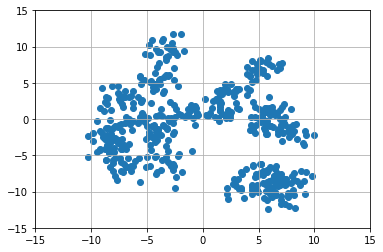

In [0]:
plt.scatter(X[:,0],X[:,1])
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.grid()

A seguir, executa o K_means e plota o gráfico com os centróides em vermelho.

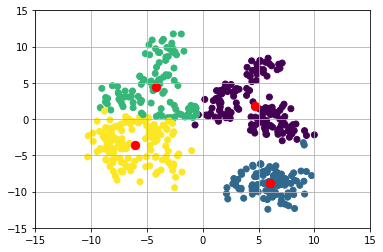

In [0]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.grid()

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')

Descobrindo o melhor número de clusters:

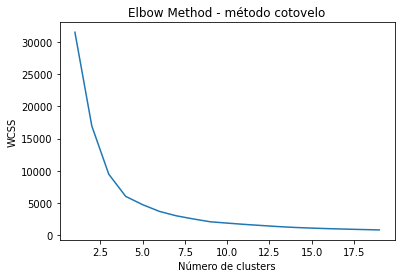

In [0]:
dataset = make_blobs(n_samples=500, centers=20, random_state=999)
X = dataset[0]
wcss=[]
for i in range(1,20):
	kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
	pred_y = kmeans.fit_predict(X)
	kmeans.fit(X)
	wcss.append(kmeans.inertia_)
plt.plot(range(1,20), wcss)
plt.title('Elbow Method - método cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Pelo método cotovelo, o melhor número de clusters para este conjunto de dados seria próximo ao 3,75, que é a absissa do ponto da curva que fica mais distante de uma reta imaginária que vai da ponta superior esquerda da curva até a sua ponta inferior direita.

Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando 5 clusters, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

In [0]:
dataset = make_blobs(n_samples=500, centers=20, random_state=999)
X = dataset[0]
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X)
kmeans.fit(X)
kmeans.inertia_

4717.404091931213

Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando apenas 1 cluster, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

In [0]:
dataset = make_blobs(n_samples=500, centers=20, random_state=999)
X = dataset[0]
kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(X)
kmeans.cluster_centers_

kmeans.inertia_


31547.372471390485

Usando a dica da Jessica Temporal https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9

Calcular o número ideal de clusters


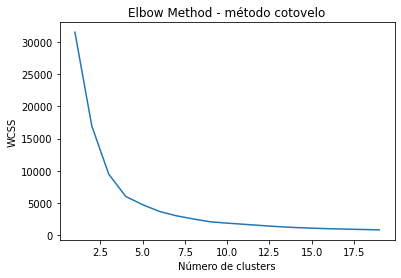

4

In [4]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

dataset = make_blobs(n_samples=500, centers=20, random_state=999)
X = dataset[0]
wcss=[]
for i in range(1,20):
	kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
	pred_y = kmeans.fit_predict(X)
	kmeans.fit(X)
	wcss.append(kmeans.inertia_)
plt.plot(range(1,20), wcss)
plt.title('Elbow Method - método cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()
optimal_number_of_clusters(wcss)

Rodando o K-means com 5 clusters:

6005.101775346179

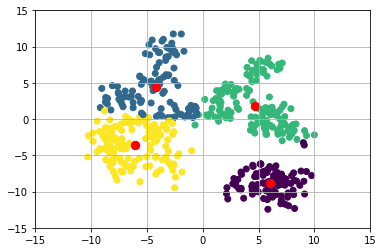

In [5]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X)
kmeans.fit(X)
kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.grid()

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
kmeans.inertia_